# Introduction to Machine Learning #

## Prerequisites ##
먼저, 오늘 하는 실습에 필요한 패키지들을 설치할게요. 이 과정은 우리가 복잡한 일을 하지 않도록 하는 **magic** 이라고 생각하시면 됩니다!

In [1]:
# 필요한 패키지 (인생을 편하게 해주는 미리 만들어놓은 프로그램이라고 보면 된다) 를 설치시킨다
!git clone https://github.com/HanyangTechAI/2021-HAI-Lecture.git
!cat 2021-HAI-Lecture/Lec01_Intro_to_ML/requirements.txt
!echo '\n위는 우리가 오늘 사용해볼 패키지들 목록입니다!'
!echo '----------------------------------'
!pip install -r 2021-HAI-Lecture/Lec01_Intro_to_ML/requirements.txt
!echo '\n----------------------------------'

## Lab 01 : Example of ML, Curve Fitting! ##

### ML(Machine Learning)의 "간단한" 소개 ###
위키백과에선 ML을 이렇게 정의하죠.
>기계 학습(機械學習) 또는 머신 러닝(영어: machine learning)은 인공 지능의 한 분야로, 컴퓨터가 학습할 수 있도록 하는 알고리즘과 기술을 개발하는 분야를 말한다.

위 말 해석 그대로 머신러닝은 컴퓨터가 스스로 학습하도록 만드는 기술입니다. 어떤 인풋이 들어가면 컴퓨터는 그 인풋을 미리 만들어놓은 알고리즘을 통해서 결과를 내놓는데, 이 중간 알고리즘을 처음부터 픽스해놓는 것이 아닌, 인풋으로 들어오는 데이터에 따라 자신을 바꾸어나갈 수 있도록 하는 것이 바로 '머신러닝'입니다. 우리가 흔히 접할 수 있는 유튜브 추천 알고리즘 <del>알수없는 유튜브 추천 알고리즘이 날 여기로 인도했다</del>, 2016년에 굉장히 핫했던 알파고(AlphaGo), Tesla가 자사의 전기차에 기능으로 제공하는 자율주행 'Autopilot' 모두 주변의 환경을 ML에 집어넣어서 학습을 하죠. (참고로, 여러분이 주변에서 들으셨을 '딥 러닝: Deep Learning' 또한 ML에 속합니다! Deep Learning은 컴퓨팅 파워가 좋아짐에 따라 복잡한 모델을 컴퓨터에 돌릴 수 있게 되어 생겨난 용어죠.) 

오늘은 이 ML에 대해서 한번 간단히 알아보고, 직접 만들어보는 시간을 가져볼 것입니다.

### What is Curve Fitting? ###
자, 그러면 한번 ML 알고리즘을 직접 작성해볼게요. 가장 처음으로 해볼 Task는 바로, Curve Fitting 입니다!  
Curve Fitting이 뭐냐면, **Curve** : 어떤 직선, 혹은 곡선에 대해 **Fitting** 주어진 데이터에 잘 알맞게(fit) 하는 수식을 찾아내는 과정입니다. 다음시간에도 배우겠지만, Curve Fitting은 하나의 가설을 세우고, 그 가설에 맞추어서 가설 안의 값 parameter를 조금씩 바꾸어나가는 과정입니다. 자 그러면 한번 시작해볼게요!

### Preparing Data ###
먼저, 학습에 필요한 데이터부터 준비해볼게요. 예제로 다음과 같은 수식이 만들어낸 데이터가 아래처럼 있다고 할게요!  

$$y={5x+3}$$  

실제 데이터처럼 일정한 노이즈도 섞어볼게요!

In [2]:
# 먼저 matplotlib 이라는 visualization 라이브러리를 import 해볼게요.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
Y: [  0.95430863  10.44961935  10.03095853  17.52785696  23.20094079
  29.74418142  37.01296904  37.97142148  43.57390224  43.82481011
  55.62049527  63.02336327  62.33965635  62.89665424  72.38937154
  77.81848089  84.41328014  88.38704894  91.55294739 101.30463561
 104.78875975]


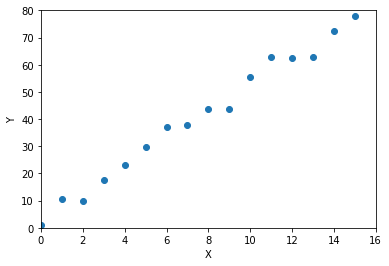

In [3]:
# 5x+3라는 함수를 한번 세워보았어요.
def f(x):
    return 5 * x + 3

# x값은 0부터 20까지로 설정해볼게요.
X = np.linspace(start=0, stop=20, num=21)
Y = f(X)
Y += np.random.normal(0, 3, 21)

print('X:', X)
print('Y:', Y)

# 그래프를 그려봐요!
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 16)
plt.ylim(0, 80)
plt.show()

### 모델

자, 그러면 한번 '모델'이라는 것을 세워서 한번 학습을 시켜볼게요.  
모델은 앞선 수업에서도 이야기했지만, 데이터를 설명하기 위한 일종의 가설입니다.  

우리는 앞선 정의에서 저 데이터는 직선 식으로부터 만들어진 데이터이니, 데이터의 가설 역시 쉽게 결정할 수 있습니다.  
다음과 같은 식으로 가설을 세워볼게요.  

$$ y = {wx + b} $$  

여기서 바뀔 수 있는 값은 $w$와 $b$겠죠?  
이러한 값을 바로 모델의 모수(parameter)라고 부릅니다.  
결국에 모델이 학습할때는 이 모수를 조금씩 바꾸어가며 최적의 해를 찾아내게 되는 것입니다.  

자, 그러면 w와 b를 조금씩 바꾸어나가며 모델이 어떻게 바뀌는지 한번 알아볼게요.

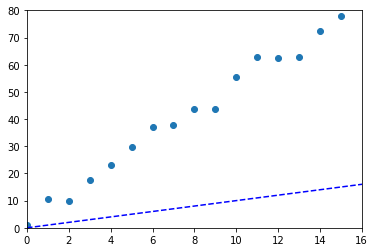

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual

def MSEInteract(w, b):
    T = [ w*i+b for i in X]
    plt.clf()
    plt.scatter(X, Y)
    plt.plot(X, T, 'b--')
    plt.xlim(0, 16)
    plt.ylim(0, 80)
    plt.show()

interact(MSEInteract, w=1, b=0);

### 학습

학습을 위해서는 우선 실제 값과 모델을 통해 예측한 값을 비교해 보아야겠지요?  
이를 도와주는 것이 바로 오차 함수(loss function) 입니다.  
다음시간에 더 자세히 다루겠지만, 조금만 더 알아보면,  
오차 함수는 실제 데이터와 모델 예측 데이터와의 차이를 계산해주는 함수입니다.  

Curve Fitting 문제에서는 오차함수로 다음과 같은 함수를 사용합니다.

$$E = {{1 \over 2}{\sum_{k=1}^N (y_k - t_k)^2}}$$  

무슨 식인가 싶겠지만, 사실 간단합니다.  
실제 데이터 t와 모델이 예측한 데이터 y간의 차이를 계산하는 함수입니다!  

Machine Learning에서  학습의 의미는 바로 여기에 있습니다.  
모델이 '학습'한다는 것은 결국에는 이 loss function을 0에 가깝도록 만든다는 것과 같은 말입니다.  

자 그러면, 한번 학습을 시켜볼까요?  
우선 MSE부터 Python으로 표현해볼게요.

In [5]:
def MSE(w, b): # MSE 식을 직접 만들어주세요.
    input_data = X # x값에 해당하는 값들입니다.
    target_data = Y # y값에 해당하는 값들입니다.
    model_out = w*np.array(X)+b # 모델 출력값입니다.
    loss = 0
    for i in range(len(input_data)):
        loss += (model_out[i]-target_data[i])**2

    return loss  

w와 b를 바꾸어가면서 MSE Loss가 어떻게 변하는지 한번 살펴볼게요!

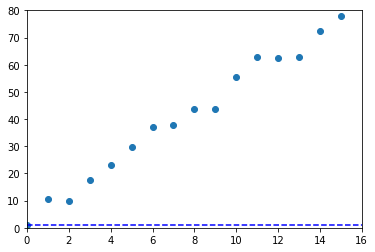

loss:


77122.2580561829

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual

def MSEInteract(w, b):
    T = [ w*i+b for i in X]
    plt.clf()
    plt.scatter(X, Y)
    plt.plot(X, T, 'b--')
    plt.xlim(0, 16)
    plt.ylim(0, 80)
    plt.show()
    print("loss:")
    return MSE(w, b)

interact(MSEInteract, w=0, b=1);

어떤가요? 휴먼-러닝 잘되나요?  
자 그러면, 머신러닝을 해보죠!  
지금 저 Loss를 줄이기 위해 했던 일들을 한번 살펴보죠 :)  
W를 바꾸었을때 Loss가 커지면 그 반대방향으로 값을 바꾸시지 않으셨나요?  

Machine Learning도 똑같습니다!  
Loss가 줄어들도록 W가 커지면 그 반대방향으로 조금씩 움직이도록 하면 되겠죠!  

자 그러면 이런 알고리즘을 만들어볼게요.  

**W Optimization**
1. gradient = 1
2. 반복
- w를 gradient가 1이면 -0.1, gradient가 -1이면 +0.1을 더한다.
- 만약 Loss가 이전보다 커지면 gradient = 1 작아지면 gradient = -1로 Update

**b Optimization**
1. gradient = 1
2. 반복
- b를 gradient가 1이면 -0.1, gradient가 -1이면 +0.1을 더한다.
- 만약 Loss가 이전보다 커지면 gradient = 1 작아지면 gradient = -1로 Update

자 그러면 w과 b를 초기값 0으로 두고 그래프를 볼게요.

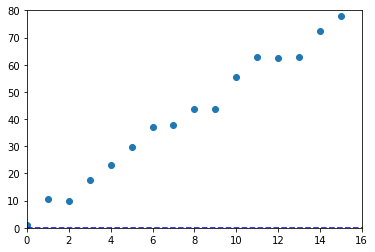

loss:


79338.90938007625

In [7]:
w=0
b=0

interact(MSEInteract, w=w, b=b);

**TRAIN**을 해봅시다!

In [8]:
gradient = 1
bef_mse = 1e9

print("W Optimization")
for i in range(1000):
    w -= gradient * 0.1
    now_mse = MSE(w, b)
    if now_mse>bef_mse:
        gradient = 1
    elif now_mse<bef_mse:
        gradient = -1
    if i%100==0:
        print("epoch {} : {}".format(i, now_mse))
    bef_mse = now_mse

gradient = 1
bef_mse = 1e9
print("B Optimization")
for i in range(1000):
    b -= gradient * 0.1
    now_mse = MSE(w, b)
    if now_mse>bef_mse:
        gradient = 1
    elif now_mse<bef_mse:
        gradient = -1
    if i%100==0:
        print("epoch {} : {}".format(i, now_mse))
    bef_mse = now_mse
    
print("TRAINED!")
print("w:{}, b:{}".format(w, b))

W Optimization
epoch 0 : 82382.2380670255
epoch 100 : 181.88897176688855
epoch 200 : 181.88897176688855
epoch 300 : 181.88897176688855
epoch 400 : 181.88897176688855
epoch 500 : 181.88897176688855
epoch 600 : 181.88897176688855
epoch 700 : 181.88897176688855
epoch 800 : 181.88897176688855
epoch 900 : 181.88897176688855
B Optimization
epoch 0 : 235.33541720698847
epoch 100 : 235.33541720698847
epoch 200 : 235.33541720698847
epoch 300 : 235.33541720698847
epoch 400 : 235.33541720698847
epoch 500 : 235.33541720698847
epoch 600 : 235.33541720698847
epoch 700 : 235.33541720698847
epoch 800 : 235.33541720698847
epoch 900 : 235.33541720698847
TRAINED!
w:5.399999999999997, b:0.0


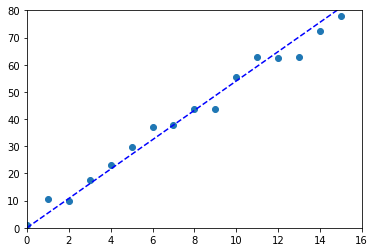

loss:


238.16028481765352

In [9]:
interact(MSEInteract, w=w, b=b);

어떤가요? 잘 학습되는게 보이시나요?  
바로 Machine Learning은 이렇게 학습을 하는거에요!  
축하합니다! 첫 머신러닝 코드를 작성하셨네요 :)  

지금 gradient라는 용어랑, 왜 이런 알고리즘이 먹히는지 이해가 안갈수도 있어요!  
다음시간에 알아보도록 해요!  

## 수고하셨습니다.